In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv


# İstenenler

- Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
- 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
- İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
- 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
- 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
- Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
- IMDB puanı en yüksek olan ilk 10 film hangileridir?
- IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
- IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
- 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
- Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
- Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.
- Hangi yılın toplam "runtime" süresi en fazladır?
- Her bir dilin en fazla kullanıldığı "Genre" nedir?
- Veri setinde outlier veri var mıdır? Açıklayınız.


In [2]:
df = pd.read_csv('/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv',encoding='latin-1')

In [3]:
def check_df(dataframe):
    
    print("#"*20,"Head","#"*20)
    print(dataframe.head())
    print("#"*20,"Shape","#"*20)
    print(dataframe.shape)
    print("#"*20,"Info","#"*20)
    print(dataframe.info())
    print("#"*20,"Missing Value","#"*20)
    print(dataframe.isna().sum())
    print("#"*20,"Describe","#"*20)
    print(dataframe.describe().T)

check_df(df)

#################### Head ####################
             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi  
#################### Shape ####################
(584, 6)
#################### Info ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584

In [4]:
# Conver to datetime
df["Premiere"] = pd.to_datetime(df["Premiere"])
df["Year"] = df["Premiere"].apply(lambda x: x.year)
df["Month"] = df["Premiere"].apply(lambda x: x.month)
df["Day"] = df["Premiere"].apply(lambda x: x.day)


# Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

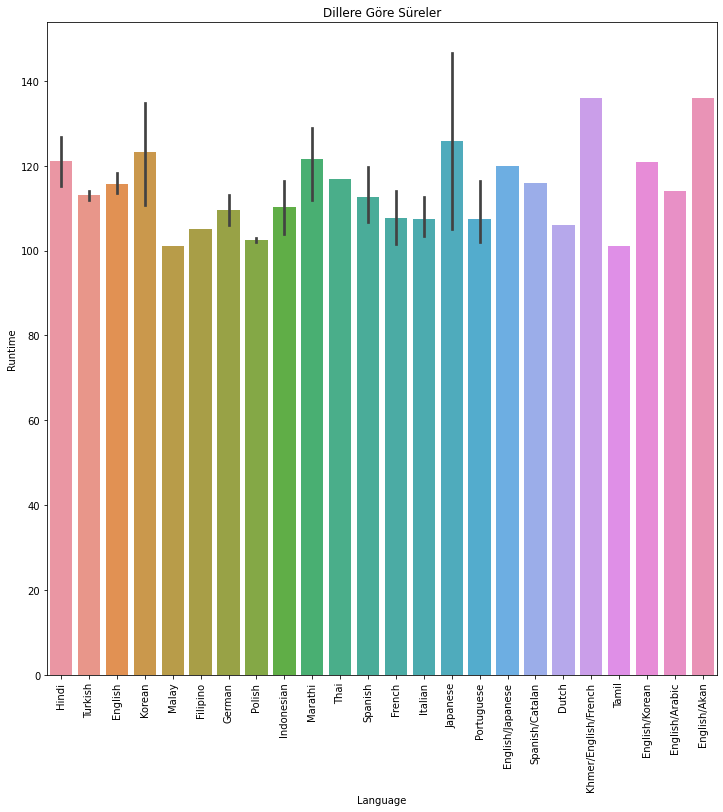

In [5]:
df_redu = df[df.Runtime > 100]
df_redu.reset_index(inplace = True)

plt.figure(figsize=(12,12))
sns.barplot(data= df_redu, x = "Language", y = "Runtime")
plt.title("Dillere Göre Süreler")
plt.xticks(rotation = 90)
plt.show()

# 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

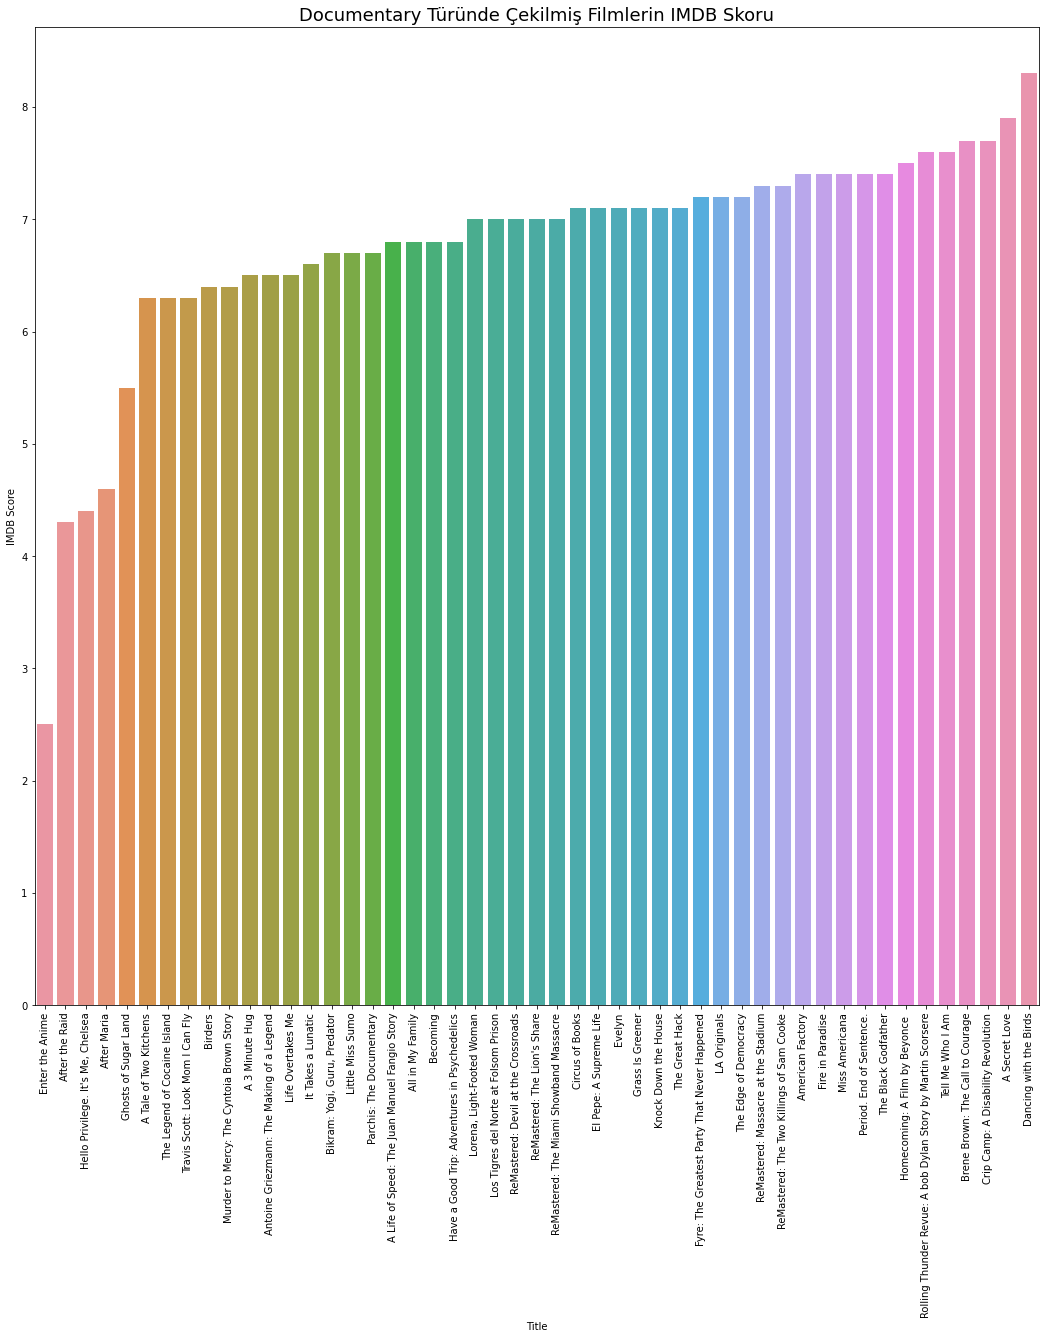

In [6]:
df_doc = df[(df["Premiere"] >= "2019-01-01") & (df["Premiere"] <= "2020-06-01") & (df["Genre"] == "Documentary")]

plt.figure(figsize=(18,18))
sns.barplot(x = "Title", y = "IMDB Score", data = df_doc)
plt.title("Documentary Türünde Çekilmiş Filmlerin IMDB Skoru",fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

# İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

Genre
Documentary                             9.0
One-man show                            8.5
Concert Film                            8.4
Animation/Christmas/Comedy/Adventure    8.2
Drama                                   7.9
Animation / Short                       7.8
Crime drama                             7.8
Musical / Short                         7.7
Animation / Science Fiction             7.5
Variety show                            7.5
Aftershow / Interview                   7.4
Animation                               7.3
Comedy-drama                            7.3
Biopic                                  7.3
Western                                 7.3
Drama-Comedy                            7.2
Historical drama                        7.2
Making-of                               7.2
Comedy                                  7.2
War                                     7.2
Mentalism special                       7.1
Psychological thriller                  7.1
Romantic comedy           

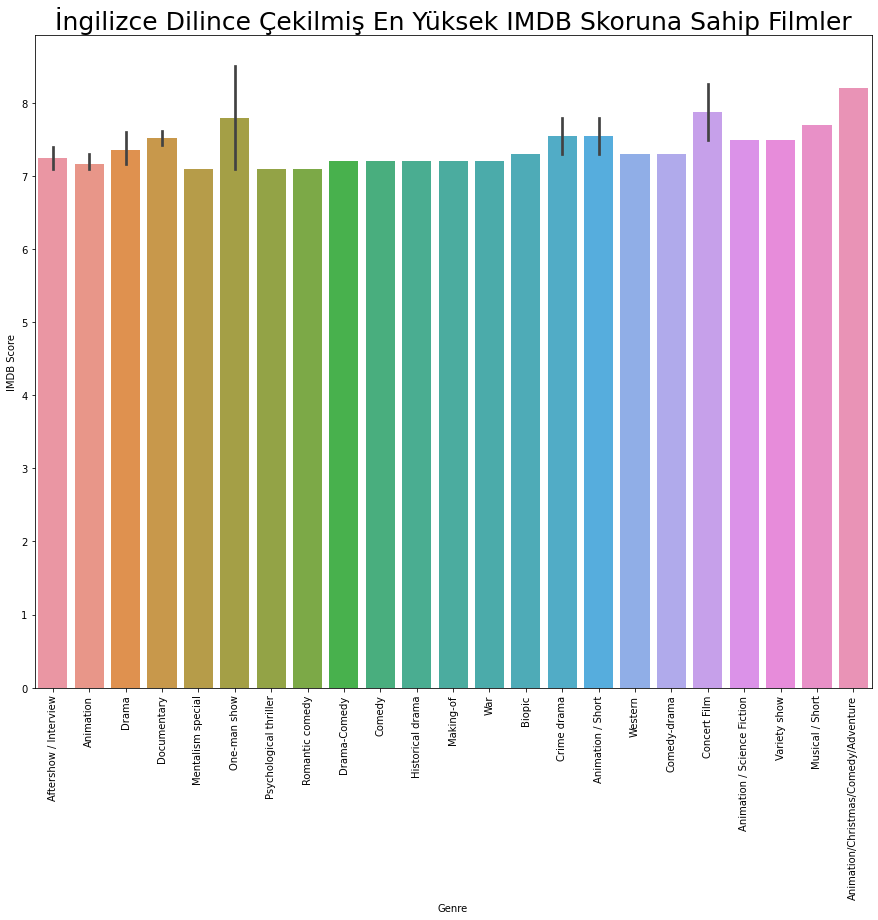

In [7]:
df_lang = df[(df["Language"] == "English") & (df["IMDB Score"] > 7.0)]


# documentary muhtemelen outlier değere sahip
print(df_lang.groupby("Genre")["IMDB Score"].max().sort_values(ascending = False))

plt.figure(figsize=(15,12))
sns.barplot(x="Genre",y = "IMDB Score",data = df_lang)
plt.title("İngilizce Dilince Çekilmiş En Yüksek IMDB Skoruna Sahip Filmler",fontsize = 25)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Genre'>

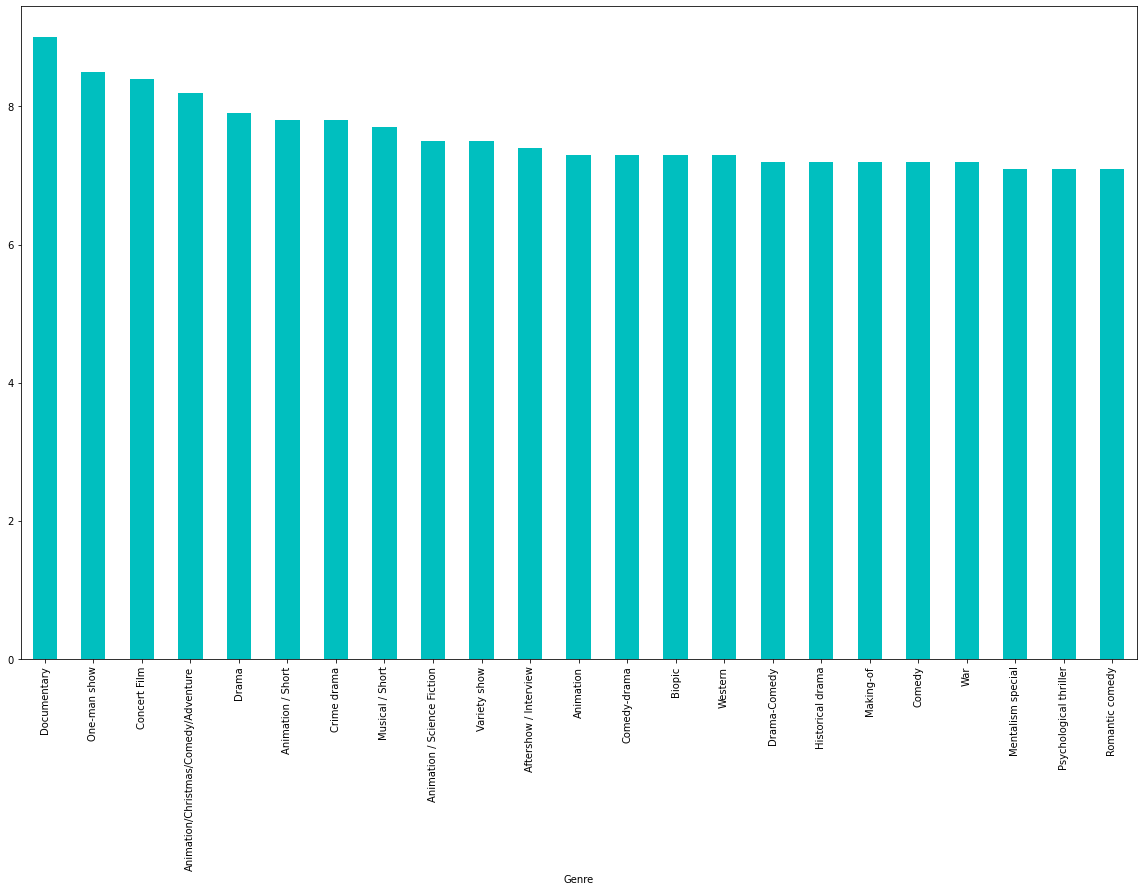

In [8]:
plt.figure(figsize=(20,12))
df_lang.groupby("Genre")["IMDB Score"].max().sort_values(ascending = False).plot(kind="bar",color ="c")

# 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [9]:
print("Hindi Dilince Çekilmiş Olan Filmlerin Ortalama Runtime Süresi : ",df[df["Language"] == "Hindi"]["Runtime"].mean())

Hindi Dilince Çekilmiş Olan Filmlerin Ortalama Runtime Süresi :  115.78787878787878


# 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

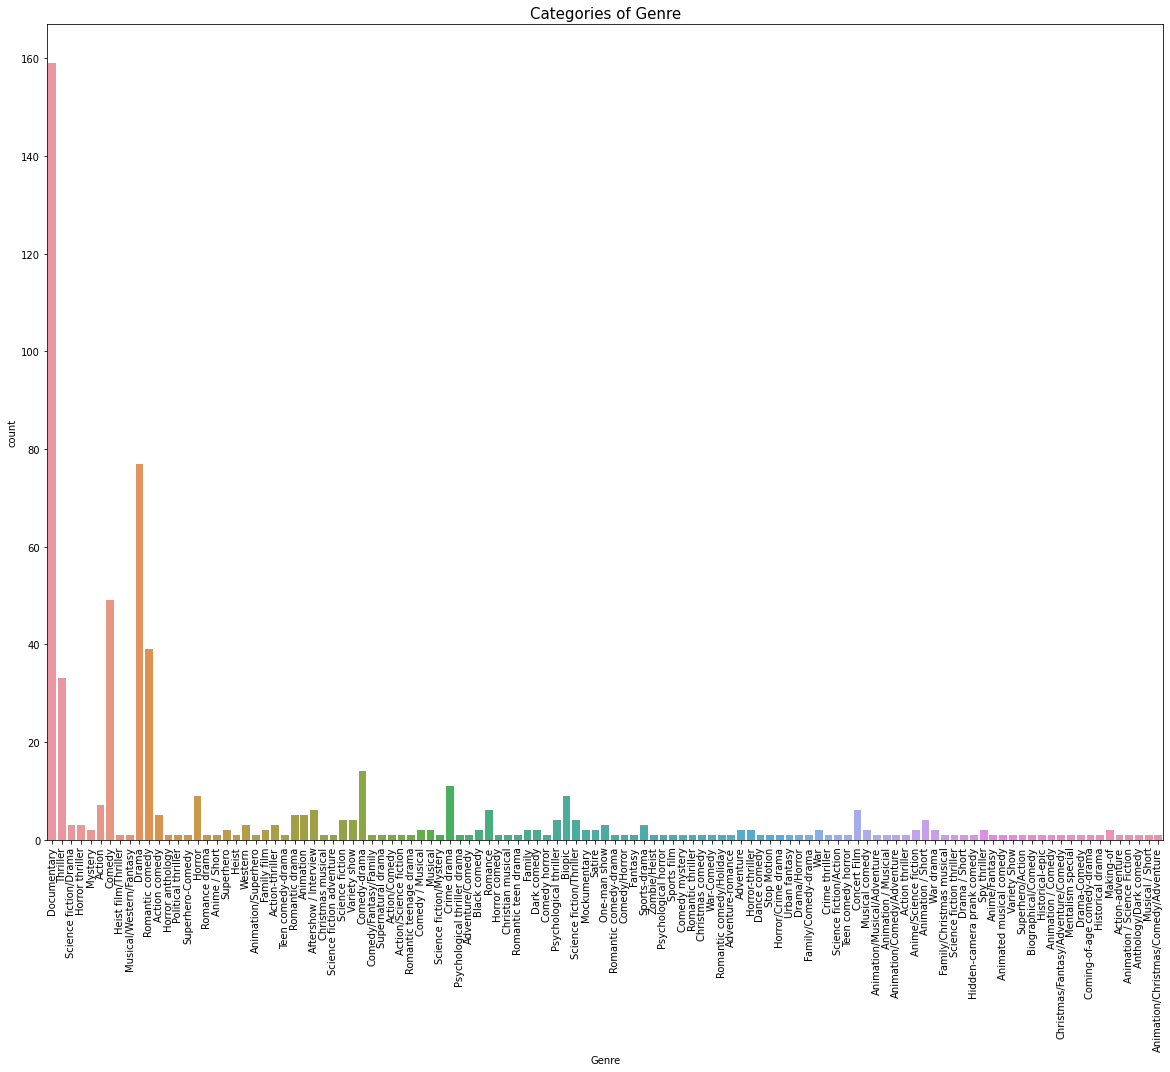

Genre Sütunu 115 Kategoriye Sahiptir.


In [10]:
def how_many_cat(dataframe,col):
    
    
    plt.figure(figsize = (20,15))
    sns.countplot(x = dataframe[col])
    plt.title(f"Categories of {col}",fontsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    
    print(f"Genre Sütunu {dataframe[col].nunique()} Kategoriye Sahiptir.")

    
how_many_cat(df,"Genre")

# Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64


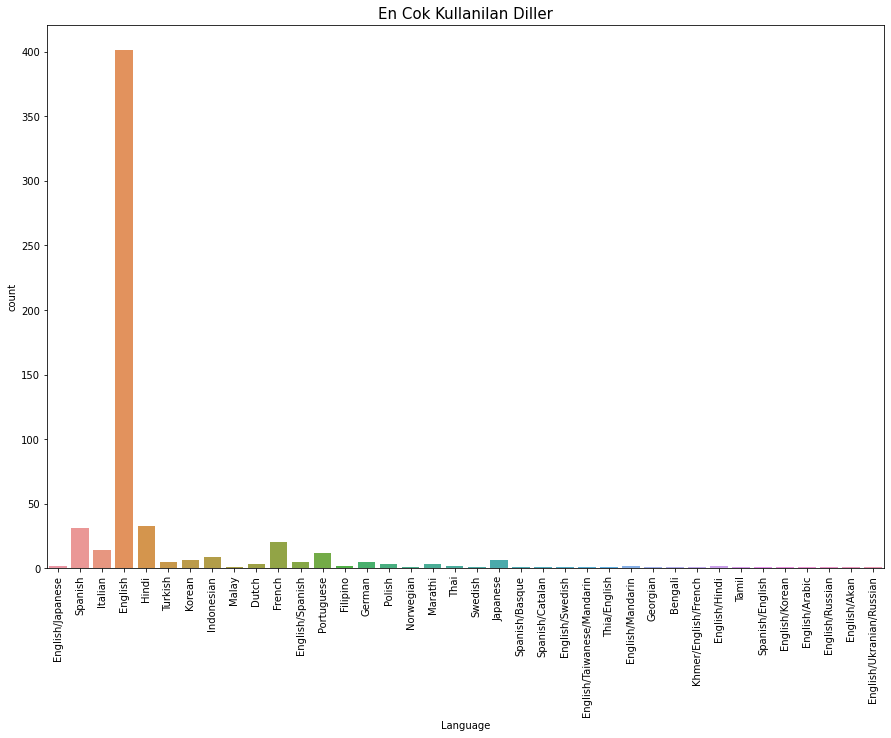

In [11]:
# En çok kullanılan diller.
print(df["Language"].value_counts()[:3])

plt.figure(figsize=(15,10))
sns.countplot(data = df, x = "Language")
plt.xticks(rotation = 90)
plt.title("En Cok Kullanilan Diller",fontsize = 15)
plt.show()


# IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [12]:
df.groupby("Title")["IMDB Score"].max().sort_values(ascending = False)[:10]

Title
David Attenborough: A Life on Our Planet       9.0
Emicida: AmarElo - It's All For Yesterday      8.6
Springsteen on Broadway                        8.5
Ben Platt: Live from Radio City Music Hall     8.4
Taylor Swift: Reputation Stadium Tour          8.4
Winter on Fire: Ukraine's Fight for Freedom    8.4
Cuba and the Cameraman                         8.3
Dancing with the Birds                         8.3
The Three Deaths of Marisela Escobedo          8.2
Seaspiracy                                     8.2
Name: IMDB Score, dtype: float64

# IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

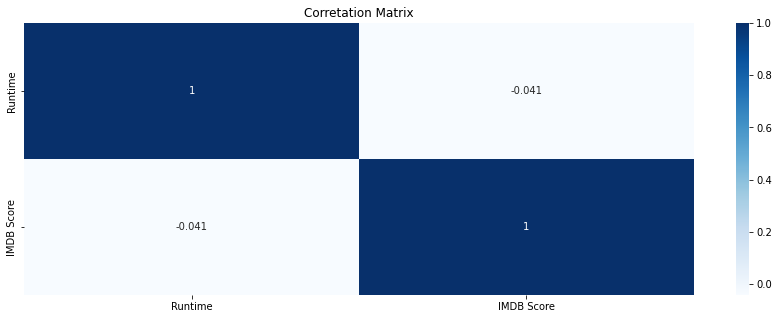

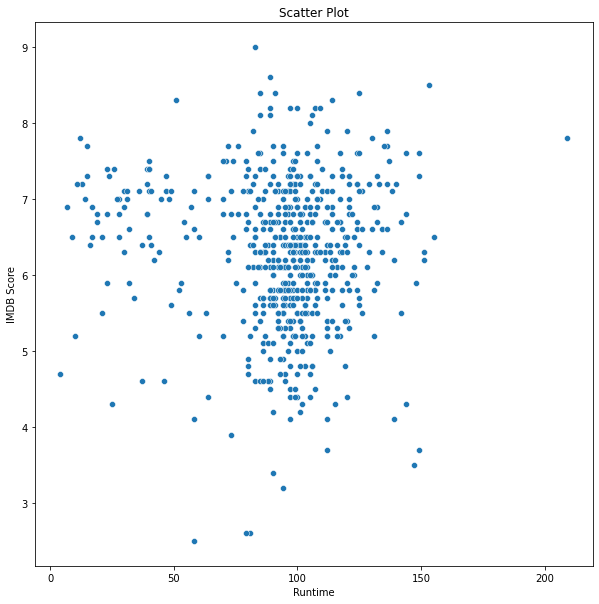

Runtime ve IMDB puanı arasında doğrusal bir ilişki yok ya da çok zayıf ilişki var diyebiliriz. 


In [13]:
def correlation_matrix(dataframe,columns):
    plt.figure(figsize=(15,5))
    sns.heatmap(dataframe[columns].corr(), annot = True,cmap='Blues')
    plt.title("Corretation Matrix")
    plt.show()
    
    plt.figure(figsize=(10,10))
    sns.scatterplot(x = dataframe[columns[0]], y = dataframe[columns[1]])
    plt.title("Scatter Plot")
    plt.show()
    
correlation_matrix(df,["Runtime","IMDB Score"])
print("Runtime ve IMDB puanı arasında doğrusal bir ilişki yok ya da çok zayıf ilişki var diyebiliriz. ")

# IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

Genre
Documentary                             9.0
One-man show                            8.5
Concert Film                            8.4
Animation/Christmas/Comedy/Adventure    8.2
Drama                                   7.9
Animation / Short                       7.8
Crime drama                             7.8
Musical / Short                         7.7
Making-of                               7.7
War drama                               7.7
Name: IMDB Score, dtype: float64


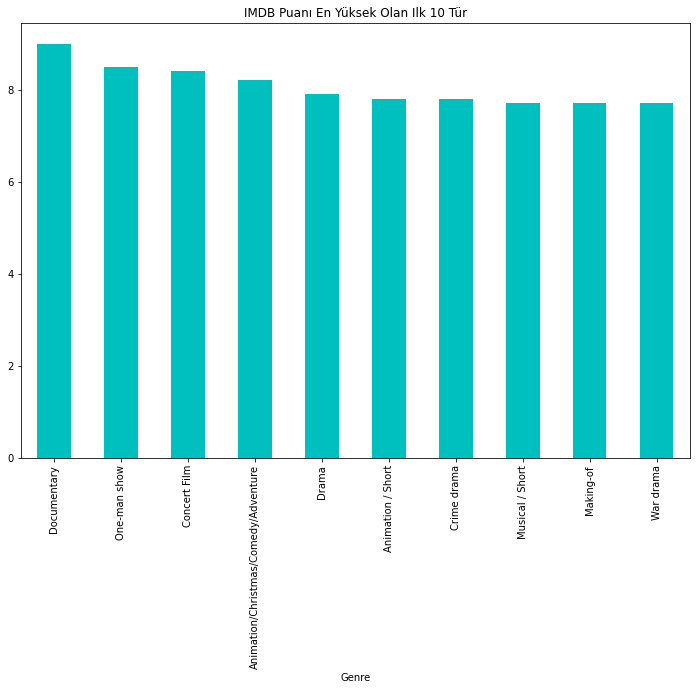

In [14]:
top_ten_imdb = df.groupby("Genre")["IMDB Score"].max().sort_values(ascending = False)[:10]
print(top_ten_imdb)

plt.figure(figsize=(12,8))
top_ten_imdb.plot(kind="bar",color = "c", title = "IMDB Puanı En Yüksek Olan Ilk 10 Tür");

# 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

Title
The Irishman                       209
Da 5 Bloods                        155
Springsteen on Broadway            153
The Forest of Love                 151
Citation                           151
Raat Akeli Hai                     149
The Last Days of American Crime    149
Ludo                               149
Army of the Dead                   148
Drive                              147
Name: Runtime, dtype: int64


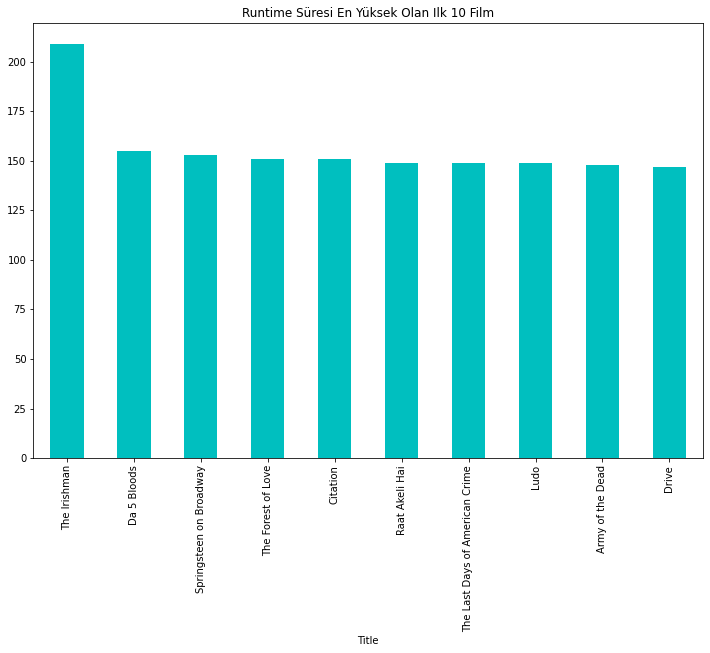

In [15]:
top_ten_runtime = df.groupby("Title")["Runtime"].max().sort_values(ascending = False)[:10]
print(top_ten_runtime)

plt.figure(figsize=(12,8))
top_ten_runtime.plot(kind="bar",color = "c", title = "Runtime Süresi En Yüksek Olan Ilk 10 Film");

# Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

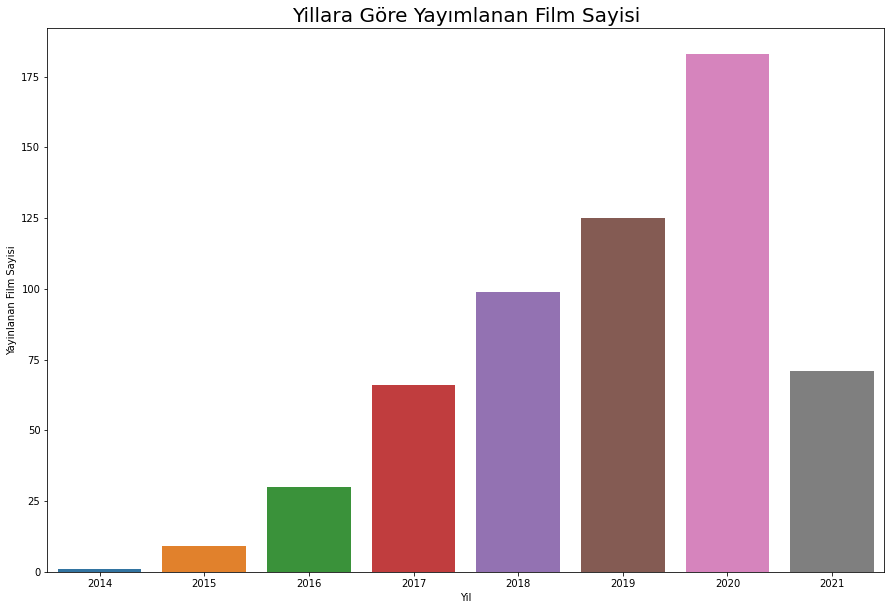

In [16]:
freq_year = df["Year"].value_counts()


plt.figure(figsize=(15,10))
sns.barplot(data=df,x = freq_year.index,y=freq_year.values)
plt.title("Yillara Göre Yayımlanan Film Sayisi",fontsize = 20)
plt.xlabel("Yil")
plt.ylabel("Yayinlanan Film Sayisi")
plt.show()

# Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.


Language
Malay                         4.200000
English/Japanese              4.400000
Norwegian                     5.100000
Filipino                      5.100000
Polish                        5.166667
Thai                          5.450000
Swedish                       5.500000
Italian                       5.542857
Spanish/Basque                5.600000
German                        5.640000
Turkish                       5.660000
French                        5.770000
Dutch                         5.800000
Indonesian                    5.844444
Korean                        5.916667
Hindi                         5.981818
Marathi                       6.066667
Portuguese                    6.216667
English/Spanish               6.220000
Spanish                       6.303226
English                       6.380050
Japanese                      6.400000
Spanish/Catalan               6.400000
English/Taiwanese/Mandarin    6.500000
English/Swedish               6.500000
Thia/English    

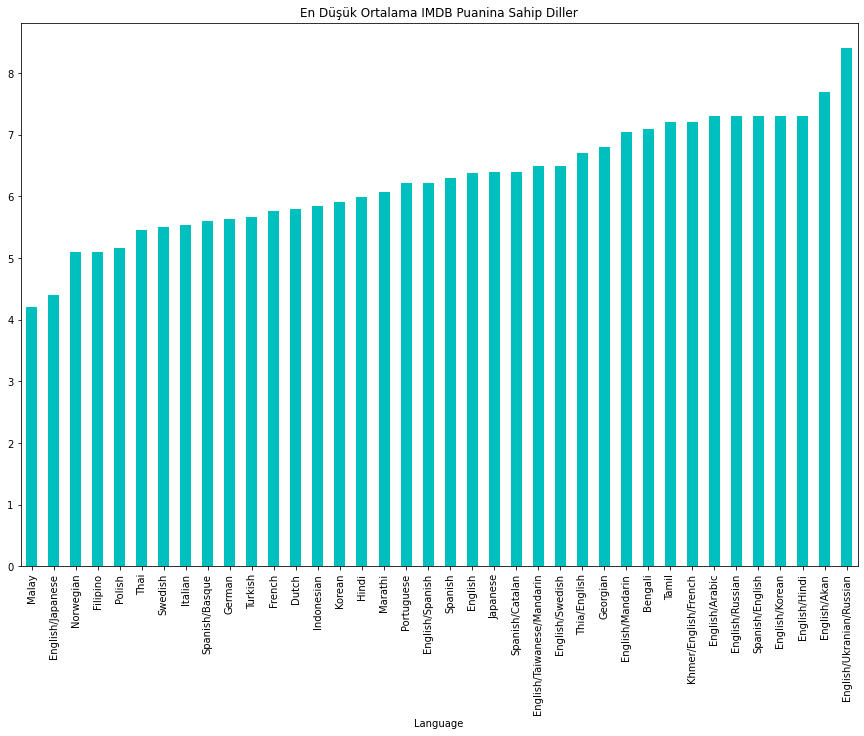

In [17]:
min_lang_imdb = df.groupby("Language")["IMDB Score"].mean().sort_values()
print(min_lang_imdb)

plt.figure(figsize=(15,10))
min_lang_imdb.plot(kind="bar",color = "c",title = "En Düşük Ortalama IMDB Puanina Sahip Diller")
plt.show()

# Hangi yılın toplam "runtime" süresi en fazladır?


Year
2020    17384
2019    10856
2018     9405
2021     7214
2017     6129
2016     2766
2015      814
2014       81
Name: Runtime, dtype: int64


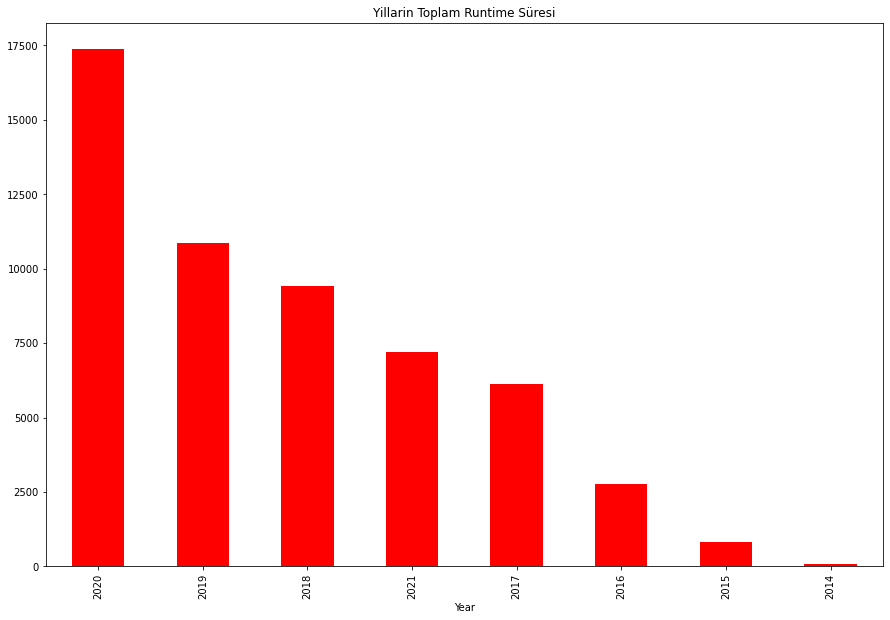

In [18]:
sum_runtime = df.groupby("Year")["Runtime"].sum().sort_values(ascending = False)
print(sum_runtime)


plt.figure(figsize = (15,10))
sum_runtime.plot(kind = "bar",color="r",title = "Yillarin Toplam Runtime Süresi")
plt.show()

# Her bir dilin en fazla kullanıldığı "Genre" nedir?


In [19]:
df.groupby("Language")["Genre"].value_counts().groupby(level=0).head(1)

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

# Veri setinde outlier veri var mıdır? Açıklayınız.

In [20]:
def outlier_detection(dataframe):
    num_cols = dataframe.select_dtypes(include = ['float64',"int64"])
    for col in num_cols:
        sns.boxplot(y = dataframe[col])
        plt.title(f"Boxplot of {col.upper()}")
        plt.show()
    
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3-Q1
    
    min_bound = Q1 - 1.5*IQR
    max_bound = Q3 + 1.5*IQR
    
    
    print("Before: ",dataframe.shape)
    
    dataframe = dataframe[~((dataframe < (min_bound)) | (dataframe > (max_bound))).any(axis=1)]
    print("After: ", dataframe.shape )
    
    return dataframe

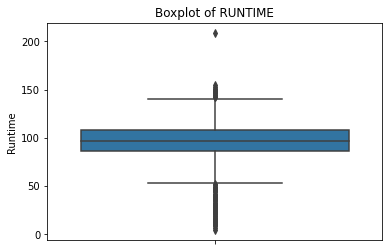

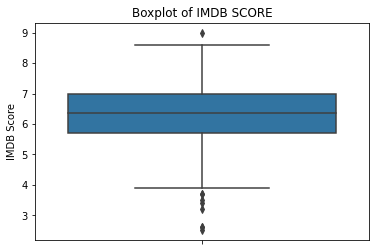

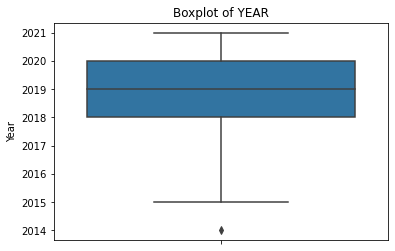

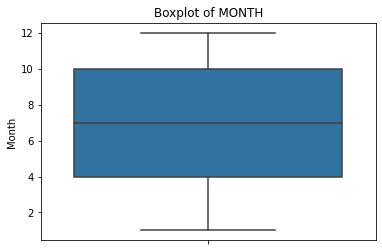

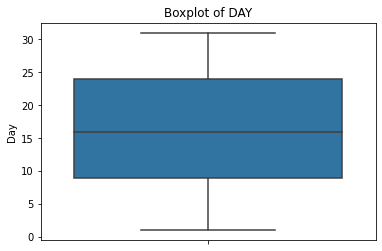

Before:  (584, 6)
After:  (501, 6)


,Runtime,IMDB Score,Language,Year,Month,Day
8,73,3.9,English,2018,3,23
9,139,4.1,Hindi,2021,5,18
10,58,4.1,English,2021,4,22
11,112,4.1,Korean,2020,11,27
12,97,4.1,Indonesian,2020,9,18
...,...,...,...,...,...,...
576,114,8.3,English,2017,11,24
578,85,8.4,English,2020,5,20
579,125,8.4,English,2018,12,31
580,91,8.4,English/Ukranian/Russian,2015,10,9


In [21]:
outlier_detection(df.loc[:,"Runtime":])

## Runtime,IMDB Score ve Year sütunlarında aykiri değerler mevcut.
## IQR tekniğine göre toplamda 83 satir aykiri değer olarak görülmüştür.